# Explore $n$-dimensional arrays

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Load the arrays

👉 First, let's load four arrays stored in NPY format, using the [`numpy.load` function](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

In [2]:
! curl https://wagon-public-datasets.s3.amazonaws.com/03-Maths/algebra_explore_arrays.zip --output arrays.zip
! unzip arrays.zip
! rm arrays.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.2M  100 18.2M    0     0   506k      0  0:00:36  0:00:36 --:--:--  621k840k    0     0   479k      0  0:00:38  0:00:12  0:00:26  582k0     0   466k      0  0:00:40  0:00:18  0:00:22  533k
Archive:  arrays.zip
  inflating: array_1.npy             
  inflating: array_2.npy             
  inflating: array_3.npy             
  inflating: array_4.npy             


In [3]:
array_1 = np.load("array_1.npy")
array_2 = np.load("array_2.npy")
array_3 = np.load("array_3.npy")
array_4 = np.load("array_4.npy")

In [5]:
# Inspect their shape, size, ndim...

for array in [array_1, array_2, array_3, array_4]:
    print(array.ndim, "|", array.shape, "|", array.size, "|", array.dtype, "|", array.min(), "|", array.max())

1 | (85847,) | 85847 | int32 | -1562174464 | 1831925248
2 | (2000, 3000) | 6000000 | int16 | 5 | 255
3 | (2808, 1872, 4) | 21026304 | uint8 | 0 | 255
4 | (38, 328, 330, 3) | 12339360 | uint8 | 14 | 250


**🧐 Given these properties, what could each arrays represent? Write your guess below!**



In [7]:
guess_1 = "Sequence of data (maybe timestamps or IDs)"
guess_2 = "Grayscale image or matrix"
guess_3 = "Series of images with alpha channel"
guess_4 = "Dataset of RGB images"

## What is `array_1`?

In [8]:
print(array_1.ndim, "|", array_1.shape, "|", array_1.size, "|", array_1.dtype, "|", array_1.min(), "|", array_1.max())

1 | (85847,) | 85847 | int32 | -1562174464 | 1831925248


👉 Plot `array_1` with `plt`

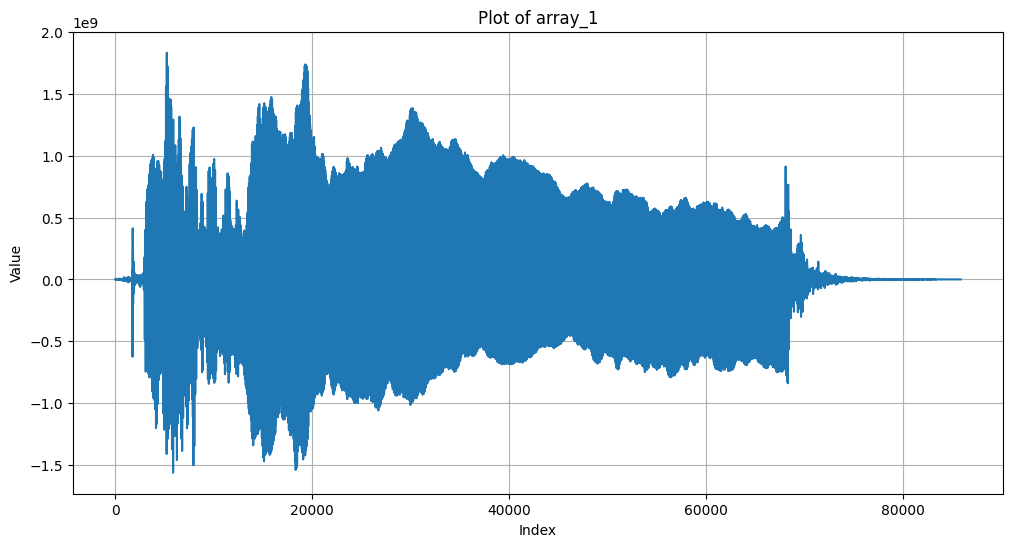

In [9]:
import matplotlib.pyplot as plt

# Plot the array
plt.figure(figsize=(12, 6))
plt.plot(array_1)
plt.title('Plot of array_1')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

👉 Does this "shape" *sound* familiar? Run the following snippet:

In [10]:
from IPython.display import Audio
rate=48_000
Audio(array_1, rate=rate)

👉 Use NumPy's `slicing` to isolate one part of the sound

In [15]:
debut_extrait = 10000
fin_extrait = 40000
extrait_audio = array_1[debut_extrait:fin_extrait]

Audio(extrait_audio, rate=rate)

👉 Try dividing the rate by 2?

In [16]:
Audio(extrait_audio, rate=rate//2)

👉 Now you can use the [`scipy.io.wavfile.write`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html) function to save the array as a WAV file. Give it a proper name ;) 

In [20]:
from scipy.io import wavfile

# Define the output filename
output_filename = "extracted_audio_segment.wav"

# Write the audio data to the file
wavfile.write(output_filename, rate//2, extrait_audio)

# Check if you can open the file!

In [21]:
ls -la

total 90440
drwxr-xr-x  12 francoisgirard  staff       384 Nov  2 09:36 ./
drwxr-xr-x   6 francoisgirard  staff       192 Nov  2 08:17 ../
drwxr-xr-x  12 francoisgirard  staff       384 Nov  2 08:17 .git/
-rw-r--r--   1 francoisgirard  staff       451 Feb  6  2023 .gitignore
drwxr-xr-x   3 francoisgirard  staff        96 Nov  2 08:20 .ipynb_checkpoints/
-rw-r--r--   1 francoisgirard  staff    457337 Nov  2 09:08 Explore-Arrays.ipynb
-rw-r--r--   1 francoisgirard  staff       148 Feb  6  2023 README.md
-rw-r--r--   1 francoisgirard  staff    343516 Jan 24  2023 array_1.npy
-rw-r--r--   1 francoisgirard  staff  12000128 Jan 24  2023 array_2.npy
-rw-r--r--   1 francoisgirard  staff  21026432 Jan 24  2023 array_3.npy
-rw-r--r--   1 francoisgirard  staff  12339488 Jan 24  2023 array_4.npy
-rw-r--r--   1 francoisgirard  staff    120044 Nov  2 09:38 extracted_audio_segment.wav


## What is `array_2`?

In [22]:
print(array_2.ndim, "|", array_2.shape, "|", array_2.size, "|", array_2.dtype, "|", array_2.min(), "|", array_2.max())

2 | (2000, 3000) | 6000000 | int16 | 5 | 255


👉 Use `matplotlib.pyplot.imshow`, with the most appropriate [`cmap` (colormap)](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

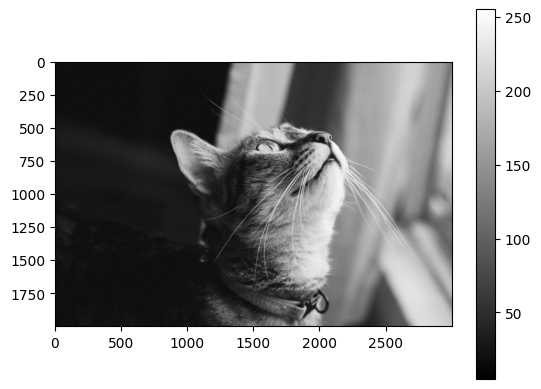

In [24]:
import matplotlib.pyplot as plt

plt.imshow(array_2, cmap='gray')
plt.colorbar()
plt.show()

👉 Use NumPy's `slicing` to isolate one part of the image

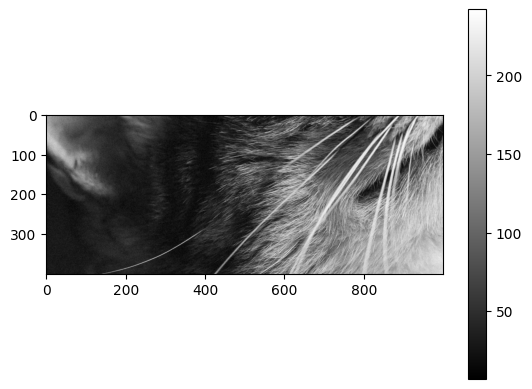

In [25]:
# Define the start and end indices for rows and columns
row_start, row_end = 800, 1200
col_start, col_end = 1000, 2000

# Extract the central region
sub_image = array_2[row_start:row_end, col_start:col_end]

# Display the extracted region
plt.imshow(sub_image, cmap='gray')
plt.colorbar()
plt.show()

👉 What does the following line do? Show the resulting image with `matplotlib.pyplot.imshow`!

<details>
<summary><i>Answer</i></summary>
    
It downscales the image by taking only one 1 row out of 3 and 1 column out of 3 from the initial image
</details>

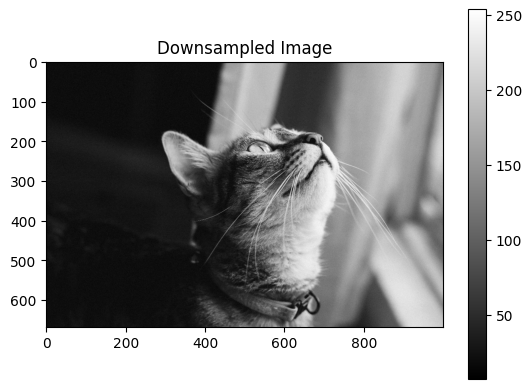

In [26]:
array_2bis = array_2[::3, ::3]

import matplotlib.pyplot as plt

plt.imshow(array_2bis, cmap='gray')
plt.colorbar()
plt.title('Downsampled Image')
plt.show()

👉 Run the following line to see how the pixels' value are distributed:

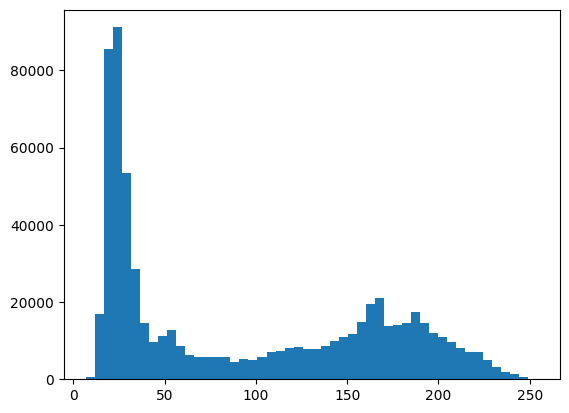

In [27]:
plt.hist(array_2bis.ravel(), bins=50);

👉 What do the following lines do? 

<details>
<summary><i>Answer</i></summary>
    
With NumPy's magic `boolean indexing`: 

- all values inferior to 0.5 are replaced by 0. (black)

- all values superior to 0.5 are replaced by 1. (white)

Here the image is *binarized*
</details>

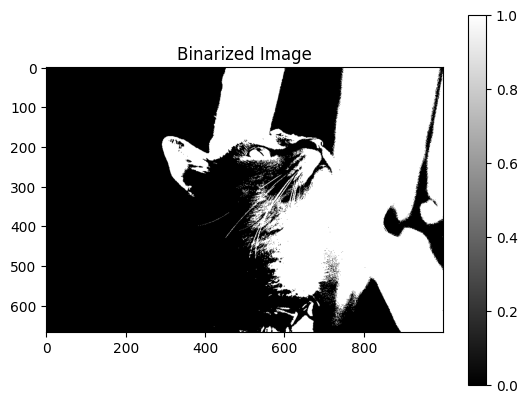

In [28]:
array_2ter = array_2bis.copy()
array_2ter[array_2bis < 128] = 0
array_2ter[array_2bis >= 128] = 1

plt.imshow(array_2ter, cmap='gray')
plt.colorbar()
plt.title('Binarized Image')
plt.show()

👉 Save your image as a PNG file or as a JPEG file using [`matplotlib.pyplot.imsave`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imsave.html) (again, use the appropriate `cmap`)

In [29]:
# PNG format
plt.imsave('binarized_image.png', array_2ter, cmap='gray')

# JPEG format
plt.imsave('binarized_image.jpg', array_2ter, cmap='gray')

In [30]:
ls -a

./                           array_1.npy
../                          array_2.npy
.git/                        array_3.npy
.gitignore                   array_4.npy
.ipynb_checkpoints/          binarized_image.jpg
Explore-Arrays.ipynb         binarized_image.png
README.md                    extracted_audio_segment.wav


## What is `array_3`?

In [31]:
print(array_3.ndim, "|", array_3.shape, "|", array_3.size, "|", array_3.dtype, "|", array_3.min(), "|", array_3.max())

3 | (2808, 1872, 4) | 21026304 | uint8 | 0 | 255


👉 Inspect the *4 channels*, by running the following snippet of code

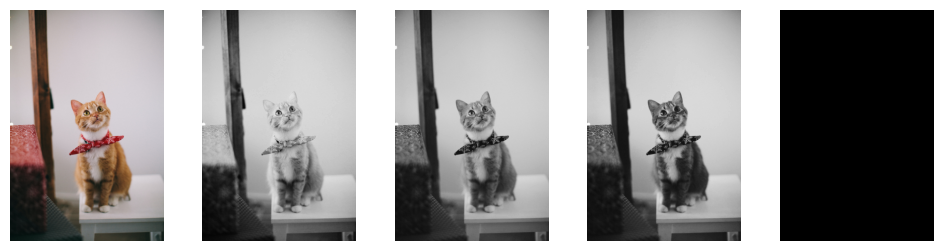

In [32]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))
axi = axs.flat # axi is an "iterator" of axes

ax = next(axi)
ax.imshow(array_3, )
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:,:,0], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:,:,1], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:,:,2], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:,:,3], cmap="gray")
ax.axis("off");

👉 Can you guess what are the four channels?

<details>
<summary><i>Answer</i></summary>
RGB + A 

A (alpha) is the opacity channel. Here all pixels are 1. (= opaque).
</details>

❓ **Let's figure-it out**
- Create a new 2D array that, for each pixel of the original image, if the value in the *1st* channel (red) is inferior to 175 (out of 255), set a value to 1 (= opaque). Otherwise set it to 0 (= transparent).
- Then, plot it with `cmap="Reds"` and check your intuition!
- Do it with Greens and Blues too!

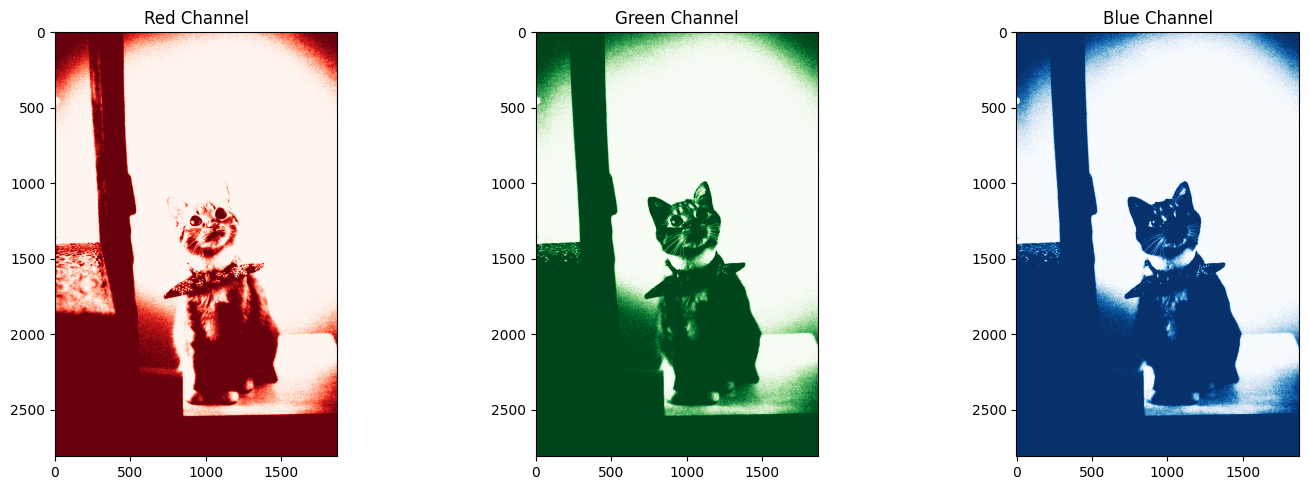

In [34]:
# Red channel
red_channel = array_3[:,:,0]
red_mask = np.where(red_channel < 175, 1, 0)

# Green channel
green_channel = array_3[:,:,1]
green_mask = np.where(green_channel < 175, 1, 0)

# Blue channel
blue_channel = array_3[:,:,2]
blue_mask = np.where(blue_channel < 175, 1, 0)

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].imshow(red_mask, cmap="Reds")
ax[0].set_title("Red Channel")

ax[1].imshow(green_mask, cmap="Greens")
ax[1].set_title("Green Channel")

ax[2].imshow(blue_mask, cmap="Blues")
ax[2].set_title("Blue Channel")

plt.tight_layout()
plt.show()

☝️ The blue channel is interesting! It isolates almost perfectly the cat from its surrounding. Let's use this to make a transparent cat to copy paste on any background!

👉 What does the following line do? 

<details>
  <summary markdown='span'>🎁 Answer</summary>

"For each pixel in initial image, if the intensity of blue channel is strong, set the opacity (4th channel) to max. Otherwise set it to 0 (= transparent)"  

</details>

(-0.5, 1871.5, 2807.5, -0.5)

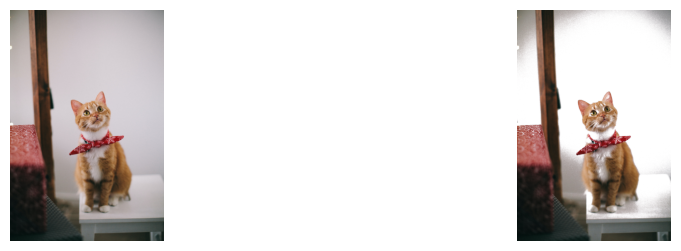

In [35]:
array_3_transparent = array_3.copy()
array_3_transparent[:,:,3] = (array_3_transparent[:,:,2] < 175).astype(int) * 255

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axi = axs.flat # axi is an "iterator" of axes

ax = next(axi)
ax.imshow(array_3, )
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_transparent, )
ax.axis("off")

👉 Save this new array_3_bis as PNG file (⚠️ the JPG format does not support transparency)

In [36]:
import matplotlib.pyplot as plt

plt.imsave("array_3_transparent.png", array_3_transparent.astype(np.uint8))

# Now, open it and paste it on a dark background!

In [37]:
ls -a

./                           array_2.npy
../                          array_3.npy
.git/                        array_3_transparent.png
.gitignore                   array_4.npy
.ipynb_checkpoints/          binarized_image.jpg
Explore-Arrays.ipynb         binarized_image.png
README.md                    extracted_audio_segment.wav
array_1.npy


## What is `array_4`?

In [38]:
print(array_4.ndim, "|", array_4.shape, "|", array_4.size, "|", array_4.dtype, "|", array_4.min(), "|", array_4.max())

4 | (38, 328, 330, 3) | 12339360 | uint8 | 14 | 250


👉 Inspect the frames by running the following snippet:

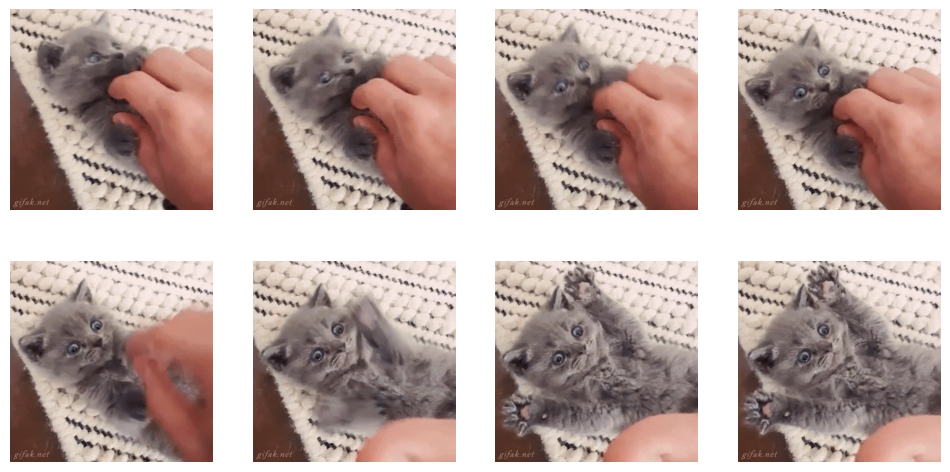

In [39]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6)) 
axi = axs.flat
for frame in np.arange(0, 38, 5):
    ax = next(axi)
    ax.imshow(array_4[frame, :, :, :]),
    ax.axis("off")

👉 Feel free to do whatever transformation you want with it!

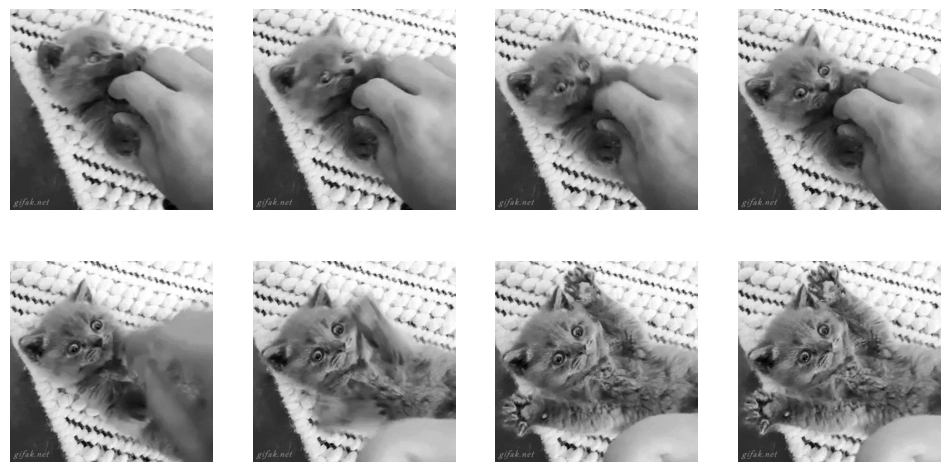

In [40]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

array_4_gray = rgb2gray(array_4)

fig, axs = plt.subplots(2, 4, figsize=(12, 6)) 
axi = axs.flat

for frame in np.arange(0, 38, 5):
    ax = next(axi)
    ax.imshow(array_4_gray[frame, :, :], cmap='gray'),
    ax.axis("off")

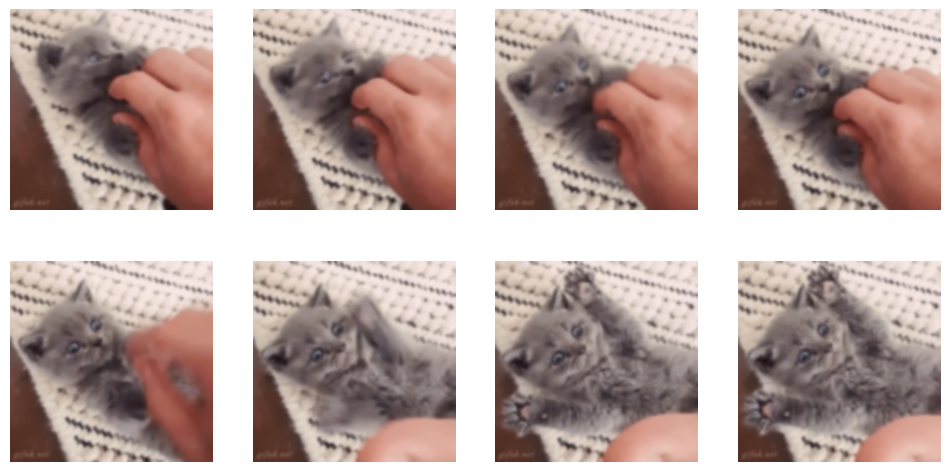

In [41]:
from scipy.ndimage import gaussian_filter

array_4_blurred = gaussian_filter(array_4, sigma=(0, 2, 2, 0))

fig, axs = plt.subplots(2, 4, figsize=(12, 6)) 
axi = axs.flat

for frame in np.arange(0, 38, 5):
    ax = next(axi)
    ax.imshow(array_4_blurred[frame, :, :, :]),
    ax.axis("off")

👉 Save it as a GIF file!

In [42]:
from PIL import Image

frames_img = [Image.fromarray(frame) for frame in array_4]
first_frame = frames_img[0]
first_frame.save("kitten.gif", save_all=True, append_images=frames_img[1:], duration=100, loop=0)

## Conclusion

👏 Bravo! Now you're mastering **🎸 sound** and **🎨 image** treatment with Python... 

... and this is just a taste of the amazing Machine Learning / Deep Learning **🚀 projects** you're gonna do with those skills!!